#Appendix

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/904

!pwd

import pandas as pd

tweets = pd.read_csv("merged.csv")
tweets

Mounted at /content/drive
/content/drive/My Drive/904
/content/drive/My Drive/904


,Unnamed: 0,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0,1323142836104081415,"""If you don't want to shut down, at least do t...",CNN,CNN,2020-11-02T06:00:09.000Z,Mon Nov 02 06:00:09 +0000 2020,505,67,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://cnn.it/3mKh3VG,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1323135280359133184,The smallest state in the nation bears the lon...,CNN,CNN,2020-11-02T05:30:08.000Z,Mon Nov 02 05:30:08 +0000 2020,376,37,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://cnn.it/2HLbB6b,0,0,NaN,NaN,NaN,NaN,NaN
2,2,1323127735624081409,Joe Biden is pledging that if he's elected pre...,CNN,CNN,2020-11-02T05:00:09.000Z,Mon Nov 02 05:00:09 +0000 2020,4610,443,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://cnn.it/3mFQaSE,0,0,NaN,NaN,NaN,NaN,NaN
3,3,1323120169691074560,A couple got married at the same Dunkin' drive...,CNN,CNN,2020-11-02T04:30:05.000Z,Mon Nov 02 04:30:05 +0000 2020,1157,82,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://cnn.it/34POYWW,0,0,NaN,NaN,NaN,NaN,NaN
4,4,1323112864153030656,"Saturn's largest moon, Titan, is the only moon...",CNN,CNN,2020-11-02T04:01:03.000Z,Mon Nov 02 04:01:03 +0000 2020,1066,163,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://cnn.it/2GjpmIl,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,12795,1310439000893779968,New fighting between Armenia and Azerbaijan th...,The Washington Post,washingtonpost,2020-09-28T04:39:39.000Z,Mon Sep 28 04:39:39 +0000 2020,147,59,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://wapo.st/3kRBu1N,0,0,NaN,NaN,NaN,NaN,NaN
12796,12796,1310431152008761345,Perspective: Renée Fleming and Vanessa William...,The Washington Post,washingtonpost,2020-09-28T04:08:27.000Z,Mon Sep 28 04:08:27 +0000 2020,174,24,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://wapo.st/3j3dcl3,0,0,NaN,NaN,NaN,NaN,NaN
12797,12797,1310423777763823618,Psychedelic medicine is being touted as a game...,The Washington Post,washingtonpost,2020-09-28T03:39:09.000Z,Mon Sep 28 03:39:09 +0000 2020,159,50,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://wapo.st/3jaRnQx,0,0,NaN,NaN,NaN,NaN,NaN
12798,12798,1310415908469342213,A D. C. man who spent 25 years in prison for m...,The Washington Post,washingtonpost,2020-09-28T03:07:53.000Z,Mon Sep 28 03:07:53 +0000 2020,1110,269,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://wapo.st/2S4kqte,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets.Name.unique()

array(['CNN', 'Fox News', 'The New York Times', 'The Washington Post'],
      dtype=object)

In [ ]:
tweets['Text'].str.contains('covid', regex=True)

0        False
1        False
2        False
3        False
4        False
         ...  
12795    False
12796    False
12797    False
12798    False
12799    False
Name: Text, Length: 12800, dtype: bool

In [ ]:
keywrods = [ 'corona', 'coronavirus', 'coronavirus', 'covid', 'covid19','COVID-19','pandemic','lockdown','mask','PPE','social distancing','contact tracing']

In [ ]:
covid_tweet = tweets[tweets['Text'].str.contains('|'.join(keywrods))]
len(covid_tweet)

1841

In [ ]:
text = covid_tweet['Text']

# Preprocessing

In [ ]:
# Importing necessary library
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import os
!pip install stop-words
from stop_words import get_stop_words


  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=03098d1679e9c4d13a1bc12da93b0ac089bd50035ef1f5bde489f81d92260485
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [ ]:
import re
import nltk
import pandas as pd
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()


def my_cool_preprocessor(text):

    text=text.lower()
    text=re.sub("\\W"," ",text) # remove special chars
    #text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    text=re.sub(r"http\S+", "", text) # remove links
    text=re.sub(r"https\S+", "", text) # remove links

    # stem words
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

#lowercase the text (note: this is done by default if a custom preprocessor is not specified)
#remove special characters
#normalize certain words
#use stems of words instead of the original form (see: preprocessing article on stemming)


cv = CountVectorizer(ngram_range=(1,3),stop_words='english', preprocessor=my_cool_preprocessor)
dtm=cv.fit_transform(text)
dtm.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

(1841, 51856)

In [ ]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names())
df_dtm

,000,000 240,000 240 000,000 acc,000 acc new,000 air,000 air ambul,000 american,000 american day,000 american dead,000 american die,000 american kill,000 american surg,000 american wa,000 base,000 base resid,000 case,000 case day,000 case sinc,000 case thi,000 coronaviru,000 coronaviru case,000 coronaviru death,000 coronaviru infect,000 coronaviru slam,000 covid,000 covid 19,000 daili,000 daili new,000 death,000 death coronaviru,000 death covid,000 death later,000 death typic,000 death viuguyovhf,000 death xuptsphkv,000 employe,000 employe caught,000 employe support,000 facil,...,zqfgq7zbe9 nwct0csan2,zqmutb5wrc,zqswbfdvnf,zs2gfybtem,zt2otse5kk,zud130wtfi,zuukuize6c,zvdts4hefq,zvrontrjrl,zvwdedc24v,zw1xvxm7dt,zw8yi0yo22,zwhhhg82bb,zwhhhg82bb everyth,zwhhhg82bb everyth need,zwick,zwick 82,zwick 82 tell,zwwjhbjto7,zwzbea4feh,zwzwuivbdv,zx1ugtzzkh,zxahyownjo,zxyamsuvjf,zxyfhiin85,zyqt5dbvnf,zz1j42cjhe,zz4jfzmq8a,zzebexu1hu,zzi3nfhkxa,zzjlzwimcz,zzomkmwtwv,zárate,zárate akcshycqqv,zárate irdcehvwci,zárate write,zárate write xfctbspu02,özil,özil hasn,özil hasn play
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


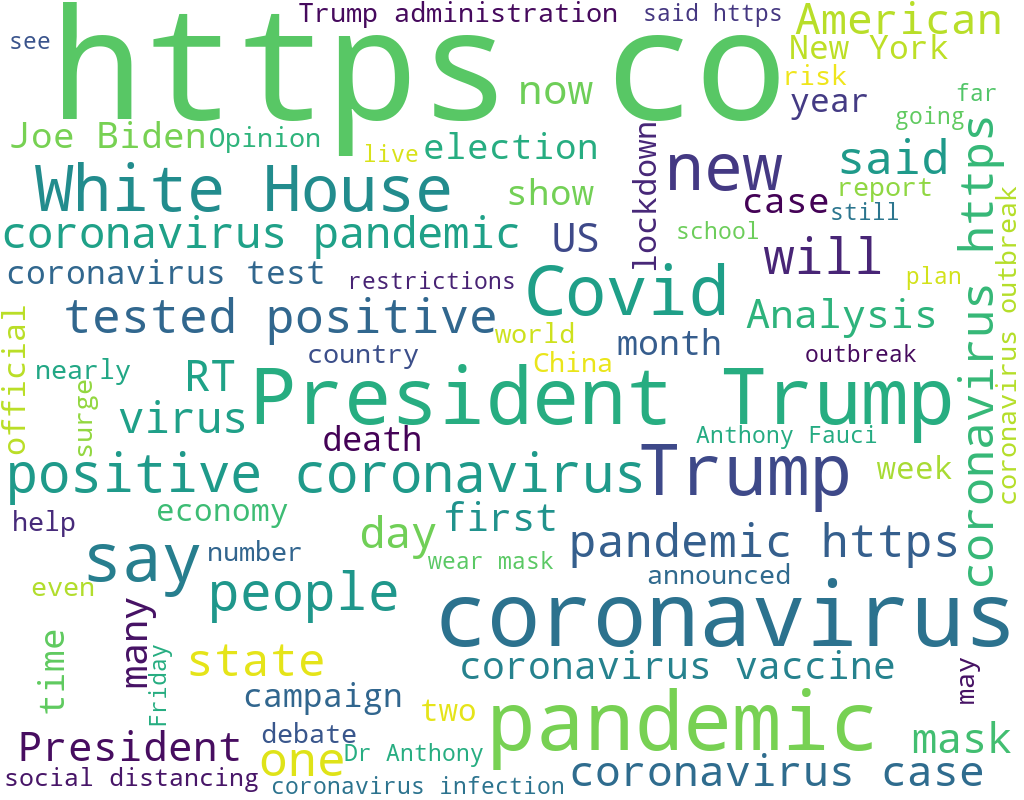

In [ ]:

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(text.values))

# Create a WordCloud object
wordcloud = WordCloud(width=1024, height=800, background_color="white", max_words=80, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_file('wordcloud.jpg')
wordcloud.to_image()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


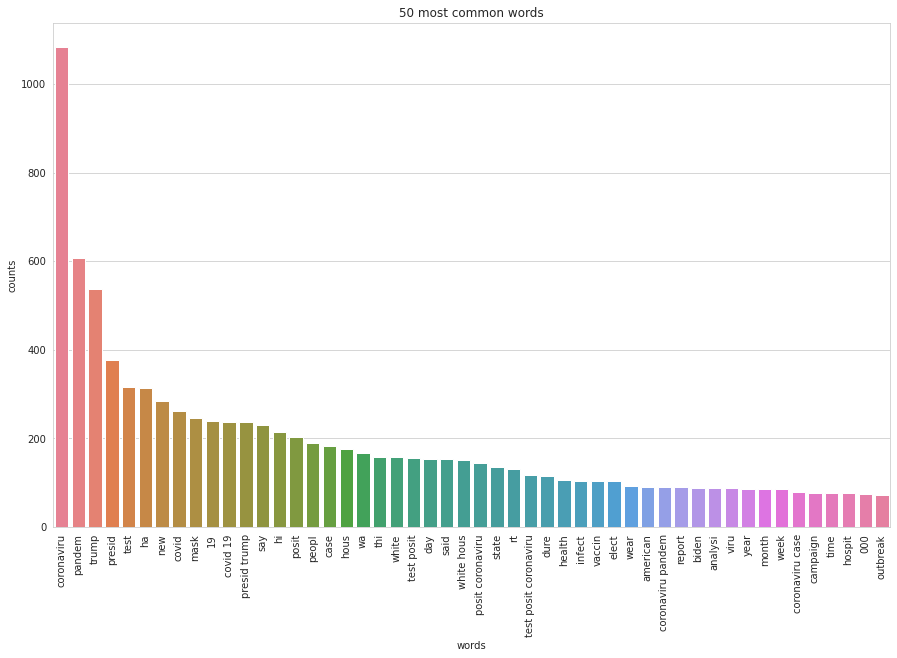

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='50 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
# count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
# count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])
# Visualise the 50 most common words
plot_50_most_common_words(dtm, cv)

# LDA Model

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below
number_topics = 3
number_words = 35
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2020)
lda.fit(dtm)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, cv, number_words)

Topics found via LDA:

Topic #0:
coronaviru pandem trump new presid mask say ha presid trump test hous covid health hi day white case white hous 19 covid 19 state said peopl thi rt wear elect dure wa dr nation distanc american help hospit

Topic #1:
coronaviru trump pandem test presid posit ha test posit covid posit coronaviru presid trump covid 19 19 test posit coronaviru mask peopl say hous hi wa white white hous new said day vaccin thi case state rt viru dure week wear month

Topic #2:
coronaviru pandem trump presid new ha covid hi case covid 19 19 say presid trump mask thi wa peopl infect rt report year state day test dure said sinc hous analysi elect white coronaviru case biden time health


In [ ]:
!pip install pyLDAvis

from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
  LDAvis_prepared = sklearn_lda.prepare(lda, dtm, cv)

with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

     |████████████████████████████████| 1.6MB 4.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=ca32c0a09e85088f9bd8ff3d87135aec7eb17fc9983ec4a56e62dea52434566c
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
topic_values = lda.transform(dtm)
doc_num, topic_num = topic_values.shape


df = pd.DataFrame({'document': text, 'lda': topic_values.argmax(axis=1)})


# TF-IDF

In [ ]:

#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, #tokenizer=tokenize,
                                 lowercase=True, preprocessor=my_cool_preprocessor)


tfidf_matrix = tfidf_vectorizer.fit_transform(text);
tfidf_matrix.shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

(1841, 26)

In [ ]:
lda_tfidf = LDA(n_components=3, random_state=2020)
lda_tfidf.fit(tfidf_matrix);

for i,topic in enumerate(lda_tfidf.components_):
    print(f'Topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-35:]])
    print('\n')

Topic #0:
['19', 'covid', 'white', 'health', 'mask', 'dure', 'hous', 'infect', 'thi', 'peopl', 'pandem', 'hi', 'say', 'state', 'presid', 'trump', 'case', 'day', 'rt', 'said', 'wa', 'posit', 'new', 'coronaviru', 'test', 'ha']


Topic #1:
['dure', 'posit', 'said', 'hi', 'rt', 'mask', 'state', 'test', 'day', 'new', 'presid', 'wa', 'ha', 'peopl', 'pandem', 'health', 'trump', 'say', 'case', 'infect', 'white', 'hous', 'thi', '19', 'covid', 'coronaviru']


Topic #2:
['posit', 'test', '19', 'hous', 'covid', 'white', 'infect', 'case', 'wa', 'ha', 'said', 'thi', 'rt', 'day', 'new', 'state', 'health', 'say', 'coronaviru', 'dure', 'hi', 'peopl', 'presid', 'mask', 'trump', 'pandem']




In [ ]:
topic_values_tf_idf = lda_tfidf.transform(tfidf_matrix)
doc_num, topic_num = topic_values_tf_idf.shape


df_tf_idf = pd.DataFrame({'document': text, 'lda': topic_values_tf_idf.argmax(axis=1)})
df_tf_idf.groupby(['lda']).count().unstack()

          lda
document  0      610
          1      544
          2      687
dtype: int64

# Analysis


In [ ]:
df.groupby(['lda']).count().unstack()
# 0 facts and task force
# 1 Election, SCOTUS, and New York
# 2 Trump

          lda
document  0      449
          1      796
          2      596
dtype: int64

In [ ]:
temp = pd.concat([covid_tweet, df['lda']], axis=1, sort=False)

media_name = pd.get_dummies(temp['Name'])
topic1 = pd.get_dummies(temp['lda'])

topic2 = pd.DataFrame(np.array(topic1),
                   columns=['facts', 'Election, SCOTUS, and New York', 'Trump and White House'])
topic2.index = topic1.index

tweet_type = pd.get_dummies(temp['Tweet Type'])
media_type = pd.get_dummies(temp['Media Type'])




temp2 = pd.concat([temp, media_name], axis=1, sort=False)
temp3 = pd.concat([temp2, topic2], axis=1, sort=False)
temp4 = pd.concat([temp3, tweet_type], axis=1, sort=False)
cv_tweets = pd.concat([temp4, media_type], axis=1, sort=False)

# Create the dictionary
follower_dictionary = {'CNN' : 51.3, 'Fox News': 21.0, 'The New York Times' : 48.3, 'The Washington Post': 16.9}

# Add a new column named 'Price'
cv_tweets['followers']= cv_tweets['Name'].map(follower_dictionary)

In [ ]:
#cv_tweets.to_csv(r'coded_cv_tweets.csv', index = False)
cv_tweets = pd.read_csv('coded_cv_tweets.csv')

In [ ]:
cv_tweets[1:4]

,Unnamed: 0,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18,lda,CNN,Fox News,The New York Times,The Washington Post,facts,"Election, SCOTUS, and New York",Trump and White House,Reply,Retweet,Tweet,animated_gif,photo,video
1,11,1323067573538377729,While social distancing is a new concept for m...,CNN,CNN,2020-11-02T01:01:05.000Z,Mon Nov 02 01:01:05 +0000 2020,672,137,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://cnn.it/2HU0ibK,0,0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0
2,12,1323059789392392198,Facts First: There appears to be no legal auth...,CNN,CNN,2020-11-02T00:30:09.000Z,Mon Nov 02 00:30:09 +0000 2020,606,101,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,https://cnn.it/37YRADK,0,0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,18,1323037167355088901,"Jobs, energy, stock markets, the COVID-19 cris...",CNN,CNN,2020-11-01T23:00:16.000Z,Sun Nov 01 23:00:16 +0000 2020,132,26,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",Tweet,NaN,1,0,photo,https://pbs.twimg.com/media/ElxfSn3XYAICkGJ.jpg,NaN,NaN,NaN,1,1,0,0,0,0,1,0,0,0,1,0,1,0


In [ ]:
cv_tweets.shape

(1841, 34)

In [ ]:
cv_tweets.describe()

,Unnamed: 0,Tweet Id,Favorites,Retweets,Hashtags,Mentions,lda,CNN,Fox News,The New York Times,The Washington Post,facts,"Election, SCOTUS, and New York",Trump and White House,Reply,Retweet,Tweet,animated_gif,photo,video
count,1841.000000,1.841000e+03,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,7007.785443,1.314563e+18,978.170016,289.497012,0.021184,0.076046,0.991852,0.281912,0.075502,0.346008,0.296578,0.332971,0.342205,0.324823,0.053232,0.071700,0.875068,0.002716,0.043998,0.065182
std,3944.273872,1.357087e+16,2409.573594,785.597439,0.151395,0.337312,0.811225,0.450053,0.264272,0.475825,0.456873,0.471404,0.474577,0.468436,0.224557,0.258061,0.330732,0.052058,0.205146,0.246914
min,0.000000,1.240352e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2935.000000,1.313643e+18,165.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8055.000000,1.316554e+18,363.000000,112.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10079.000000,1.319800e+18,861.000000,248.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,12799.000000,1.323143e+18,61572.000000,20599.000000,2.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#pd.DataFrame(media = ['CNN',	'Fox News','The New York Times','The Washington Post'],[0.281912,0.075502,0.346008,0.296578])

In [ ]:
cv_tweets.groupby(['Name']).count().unstack()


            Name               
Unnamed: 0  CNN                    519
            Fox News               139
            The New York Times     637
            The Washington Post    546
Tweet Id    CNN                    519
                                  ... 
photo       The Washington Post    546
video       CNN                    519
            Fox News               139
            The New York Times     637
            The Washington Post    546
Length: 132, dtype: int64

In [ ]:
groupped_data = cv_tweets.groupby(['Name']).agg({'Trump and White House':sum})
groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
groupped_data

,Trump and White House,%
Name,,
CNN,181,30.267559
Fox News,57,9.531773
The New York Times,160,26.755853
The Washington Post,200,33.444816


In [ ]:
groupped_data = cv_tweets.groupby(['Name']).agg({'Election, SCOTUS, and New York':sum})
groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
groupped_data

,"Election, SCOTUS, and New York",%
Name,,
CNN,131,20.793651
Fox News,47,7.460317
The New York Times,257,40.793651
The Washington Post,195,30.952381


In [ ]:
groupped_data = cv_tweets.groupby(['Name']).agg({'facts':sum})
groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
groupped_data

,facts,%
Name,,
CNN,207,33.768352
Fox News,35,5.709625
The New York Times,220,35.889070
The Washington Post,151,24.632953


In [ ]:
import statsmodels.api as sm
!pip install stargazer
from stargazer.stargazer import Stargazer


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
politicization = cv_tweets['Trump and White House'] + cv_tweets['Election, SCOTUS, and New York']
cv_tweets['politicization'] = politicization

In [ ]:
meida_x = cv_tweets[['The Washington Post','The New York Times','Fox News']]
fox = cv_tweets[['Fox News']]


media_model1 = sm.Logit(cv_tweets[['Trump and White House']], sm.add_constant(meida_x.astype(float)), missing = 'drop').fit()
media_model2 = sm.Logit(cv_tweets[['Election, SCOTUS, and New York']], sm.add_constant(meida_x.astype(float)), missing = 'drop').fit()
media_model3 = sm.Logit(politicization, sm.add_constant(meida_x.astype(float)), missing = 'drop').fit()
media_model4 = sm.Logit(politicization, sm.add_constant(fox.astype(float)), missing = 'drop').fit()


stargazer_media = Stargazer([media_model1,media_model2,media_model3,media_model4])
stargazer_media

Optimization terminated successfully.
         Current function value: 0.623267
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.634216
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630100
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.634997
         Iterations 5


In [ ]:
y_rt = cv_tweets['Retweets']
y_like = cv_tweets['Favorites']

x_s = cv_tweets[['Trump and White House','Election, SCOTUS, and New York']]
x = cv_tweets[['Trump and White House','Election, SCOTUS, and New York','Hashtags','video','The Washington Post','The New York Times','Fox News','followers']]
model1 = sm.OLS(y_rt, sm.add_constant(x_s.astype(float)), missing = 'drop').fit()
model2 = sm.OLS(y_rt, sm.add_constant(x.astype(float)), missing = 'drop').fit()
model3 = sm.OLS(y_like, sm.add_constant(x_s.astype(float)), missing = 'drop').fit()
model4 = sm.OLS(y_like, sm.add_constant(x.astype(float)), missing = 'drop').fit()


stargazer_reaction = Stargazer([model1,model2,model3,model4])
stargazer_reaction.covariate_order(['Election, SCOTUS, and New York','Trump and White House','The Washington Post','The New York Times','Fox News',
                                    'Hashtags','video', 'followers','const'])


stargazer_reaction
# model2.summary()

In [ ]:
import math
print('mean rt: ', np.mean(np.array(y_rt)), '\n',
      'mean likes: ', np.mean(np.array(y_like)))

mean rt:  289.4970124932102 
 mean likes:  978.1700162954916


In [ ]:
x_f = cv_tweets[['Trump and White House','Election, SCOTUS, and New York','The Washington Post','The New York Times','Fox News']]

model_follower = sm.OLS(follower, sm.add_constant(x_f.astype(float)), missing = 'drop').fit()
model_follower.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.494e+31
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:08:23   Log-Likelihood:                 30314.
No. Observations:                1841   AIC:                        -6.062e+04
Df Residuals:                    1835   BIC:                        -6.058e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.077e-09   1.04e-09      1.999      0.046    3.92e-11    4.12e-09
Trump and White House          -3.347e-10   1.07e-09     -0.313      0.755   -2.43e-09    1.76e-09
Election, SCOTUS, and New York  6.876e-09   1.01e-09      6.806      0.000    4.89e-09    8.86e-09
The Washington Post              1.69e+07   1.05e-09   1.61e+16      0.000    1.69e+07    1.69e+07
The New York Times              2.134e-08   1.01e-09     21.075      0.000    1.94e-08    2.33e-08
Fox News                        7.178e-09   1.63e-09      4.392      0.000    3.97e-09    1.04e-08
==============================================================================
Omnibus:                    17662.215   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.167
Skew:                          -0.096   Prob(JB):                     7.44e-35
Kurtosis:                       1.582   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""